## <b> Carga de librerias </b>

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore')

import matplotlib.pyplot as plt
import seaborn as sns

import modules as md 

## <b> Carga de datasets </b>

In [2]:
train = pd.read_csv('train.csv',  sep=',', dtype={'Monthly_Inhand_Salary':float})

## <b>Depuración de datos </b>

### Columnas de tipo transaccional

In [3]:
train.drop(columns=['ID' ,'Customer_ID' ,'Month' ,'Name', 
'Type_of_Loan', 'Credit_History_Age', 'SSN'], inplace=True)

### Filas con mas de 3 valores nulos

In [4]:
train = train[train.isnull().sum(axis=1) < 3]

In [5]:
train = train[train["Monthly_Balance"]!='__-333333333333333333333333333__']

### Verificación de nulos

In [6]:
train['Monthly_Inhand_Salary'].fillna(method='backfill')

0        1824.843333
1        1824.843333
2        1824.843333
3        1824.843333
4        1824.843333
            ...     
99995    3359.415833
99996    3359.415833
99997    3359.415833
99998    3359.415833
99999    3359.415833
Name: Monthly_Inhand_Salary, Length: 99890, dtype: float64

In [7]:
train.isnull().sum()

Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       14914
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       6922
Changed_Credit_Limit            0
Num_Credit_Inquiries         1927
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4408
Payment_Behaviour               0
Monthly_Balance              1167
Credit_Score                    0
dtype: int64

## <b> Data Cleaning and Imputation </b>

### Monthly_Inhand_Salary

In [8]:
backfill = train['Monthly_Inhand_Salary'].fillna(method='backfill')

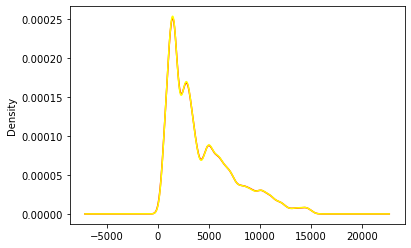

In [9]:
fig = plt.figure()
fig.add_subplot(111)
train['Monthly_Inhand_Salary'].plot.density(color="red")
backfill.plot.density(color="yellow")
plt.show()

In [10]:
train['Monthly_Inhand_Salary'].fillna(method='backfill', inplace=True)

### Num_of_Delayed_Payment

In [11]:
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].apply(md.clean_text_symbols).astype(np.float)

In [12]:
meanValues = np.round(train['Num_of_Delayed_Payment'].mean(), 0)
medianValues = np.round(train['Num_of_Delayed_Payment'].median(), 0)
print (f"Media: {meanValues}")
print (f"Mediana: {medianValues}")

dataset_FL_meanImp = train['Num_of_Delayed_Payment'].fillna(meanValues)
dataset_FL_medianImp = train['Num_of_Delayed_Payment'].fillna(medianValues)

Media: 31.0
Mediana: 14.0


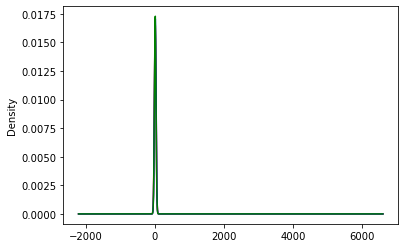

In [13]:
fig = plt.figure()
fig.add_subplot(111)
train['Num_of_Delayed_Payment'].plot.density(color="red")
dataset_FL_meanImp.plot.density(color="blue")
dataset_FL_medianImp.plot.density(color="green")
plt.show()

In [14]:
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].fillna(meanValues)

In [15]:
ohe = pd.get_dummies(train['Credit_Score'])
train = train.join(ohe)

### Num_Credit_Inquiries

In [16]:
train['Num_Credit_Inquiries'] = train['Num_Credit_Inquiries'].astype(float)

In [17]:
meanValues = np.round(train['Num_Credit_Inquiries'].mean(), 0)
medianValues = np.round(train['Num_Credit_Inquiries'].median(), 0)
print (f"Media: {meanValues}")
print (f"Mediana: {medianValues}")
dataset_FL_meanImp = train['Num_Credit_Inquiries'].fillna(meanValues)
dataset_FL_medianImp = train['Num_Credit_Inquiries'].fillna(medianValues)

Media: 28.0
Mediana: 6.0


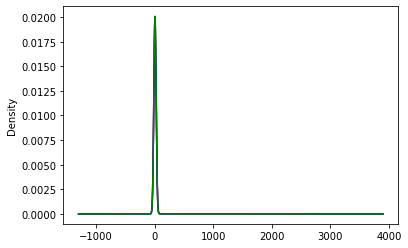

In [18]:
fig = plt.figure()
fig.add_subplot(111)
train['Num_Credit_Inquiries'].plot.density(color="red")
dataset_FL_meanImp.plot.density(color="blue")
dataset_FL_medianImp.plot.density(color="green")
plt.show()

In [19]:
train['Num_Credit_Inquiries'] = train['Num_Credit_Inquiries'].fillna(meanValues)

### Amount_invested_monthly

In [20]:
train["Amount_invested_monthly"]=train["Amount_invested_monthly"].apply(md.clean_text_symbols_2)
train["Amount_invested_monthly"]=train["Amount_invested_monthly"].astype("float")

In [21]:
meanValues = np.round(train['Amount_invested_monthly'].mean(), 0)
medianValues = np.round(train['Amount_invested_monthly'].median(), 0)
print (f"Media: {meanValues}")
print (f"Mediana: {medianValues}")
dataset_FL_meanImp = train['Amount_invested_monthly'].fillna(meanValues)
dataset_FL_medianImp = train['Amount_invested_monthly'].fillna(medianValues)

Media: 637.0
Mediana: 136.0


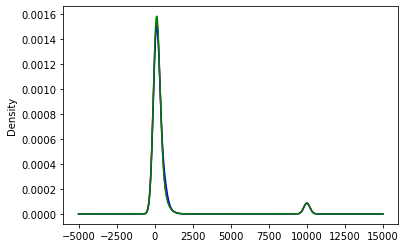

In [22]:
fig = plt.figure()
fig.add_subplot(111)
train['Amount_invested_monthly'].plot.density(color="red")
dataset_FL_meanImp.plot.density(color="blue")
dataset_FL_medianImp.plot.density(color="green")
plt.show()

In [23]:
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].fillna(meanValues)

### Monthly_Balance

In [24]:
train["Monthly_Balance"]=train["Monthly_Balance"].apply(md.clean_text_symbols)
train["Monthly_Balance"]=train["Monthly_Balance"].astype("float")

In [25]:
meanValues = np.round(train['Monthly_Balance'].mean(), 0)
medianValues = np.round(train['Monthly_Balance'].median(), 0)
print (f"Media: {meanValues}")
print (f"Mediana: {medianValues}")
dataset_FL_meanImp = train['Monthly_Balance'].fillna(meanValues)
dataset_FL_medianImp = train['Monthly_Balance'].fillna(medianValues)

Media: 403.0
Mediana: 337.0


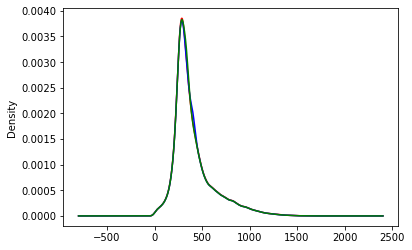

In [26]:
fig = plt.figure()
fig.add_subplot(111)
train['Monthly_Balance'].plot.density(color="red")
dataset_FL_meanImp.plot.density(color="blue")
dataset_FL_medianImp.plot.density(color="green")
plt.show()

In [27]:
train['Monthly_Balance'] = train['Monthly_Balance'].fillna(meanValues)

### Changed_Credit_Limit

In [28]:
train["Changed_Credit_Limit"]=train['Changed_Credit_Limit'].replace('_',0)
train["Changed_Credit_Limit"]=train["Changed_Credit_Limit"].str.strip()
train["Changed_Credit_Limit"]=train["Changed_Credit_Limit"].astype(float)

meanValues = np.round(train['Changed_Credit_Limit'].mean(), 0)
medianValues = np.round(train['Changed_Credit_Limit'].median(), 0)
print (f"Media: {meanValues}")
print (f"Mediana: {medianValues}")
dataset_FL_meanImp = train['Changed_Credit_Limit'].fillna(meanValues)
dataset_FL_medianImp = train['Changed_Credit_Limit'].fillna(medianValues)

Media: 10.0
Mediana: 9.0


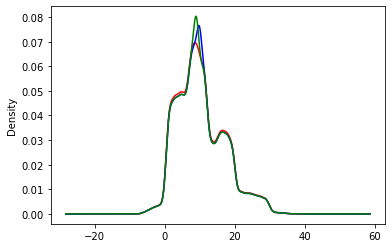

In [29]:
fig = plt.figure()
fig.add_subplot(111)
train['Changed_Credit_Limit'].plot.density(color="red")
dataset_FL_meanImp.plot.density(color="blue")
dataset_FL_medianImp.plot.density(color="green")
plt.show()

In [30]:
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].fillna(meanValues)

### Credit_Mix

In [31]:
train['Credit_Mix'] = train['Credit_Mix'].replace('_', np.nan)
train['Credit_Mix'] = train['Credit_Mix'].fillna(np.random.choice(pd.Series(['Standard', 'Good', 'Bad'])))

### Outstanding_Debt

In [32]:
train["Outstanding_Debt"]=train["Outstanding_Debt"].apply(md.clean_text_symbols)
train["Outstanding_Debt"]=train["Outstanding_Debt"].astype("float")

### Payment_of_Min_Amount

In [33]:
train['Payment_of_Min_Amount'] = train['Payment_of_Min_Amount'].replace('NM', np.nan)
train['Payment_of_Min_Amount'] = train['Payment_of_Min_Amount'].fillna(np.random.choice(pd.Series(['Yes', 'No'])))

### Payment_Behaviour

In [34]:
train['Payment_Behaviour'] = train['Payment_Behaviour'].replace('!@9#%8', np.nan)
train['Payment_Behaviour'] = train['Payment_Behaviour'].fillna(np.random.choice(pd.Series(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments'])))

In [35]:
train['Occupation'] = train['Occupation'].replace('_______', np.nan)
train['Occupation'] = train['Occupation'].fillna(np.random.choice(pd.Series(['Scientist',
 'Teacher', 'Engineer', 'Entrepreneur', 'Developer', 'Lawyer', 'Media_Manager',
 'Doctor', 'Journalist', 'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'])))

## <b> Categorizacion de variables </b>

In [36]:
train["Age"]=train["Age"].apply(md.clean_text_symbols)
train["Age"]=train["Age"].astype(int)

train["Annual_Income"]=train["Annual_Income"].apply(md.clean_text_symbols)
train["Annual_Income"]=train["Annual_Income"].astype(float)

train["Num_of_Loan"]=train["Num_of_Loan"].apply(md.clean_text_symbols)
train['Num_of_Loan'] = train['Num_of_Loan'].astype(int)

In [37]:
categoric_vars, discrete_vars, continues_vars = md.getColumnsDataTypes(train)

In [38]:
del(discrete_vars)
categoric_vars.pop()
y = 'Credit_Score'

## <b> Analisis de datos </b>

### Variables Categoricas

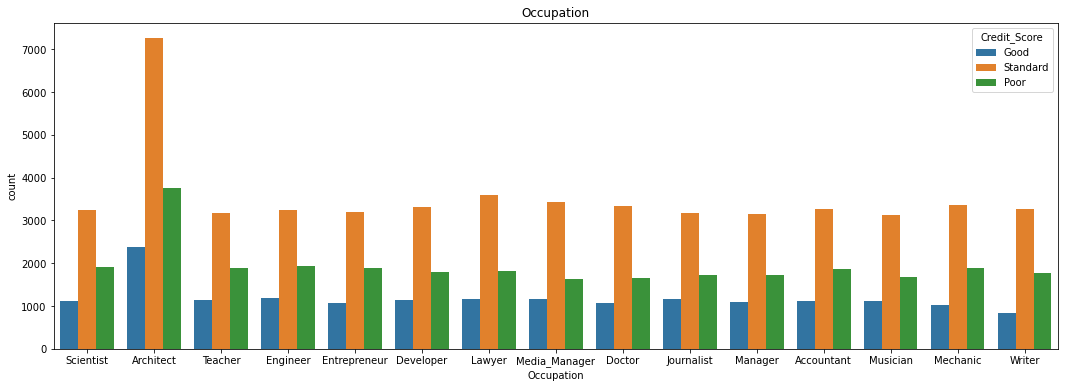

Architect        13405
Lawyer            6567
Engineer          6346
Scientist         6292
Mechanic          6284
Accountant        6263
Developer         6228
Media_Manager     6224
Teacher           6210
Entrepreneur      6171
Doctor            6076
Journalist        6069
Manager           5970
Musician          5905
Writer            5880
Name: Occupation, dtype: int64


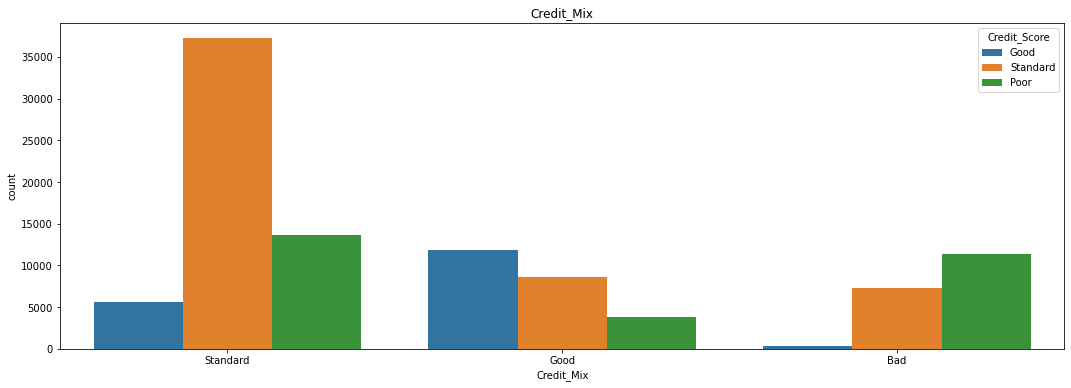

Standard    56617
Good        24313
Bad         18960
Name: Credit_Mix, dtype: int64


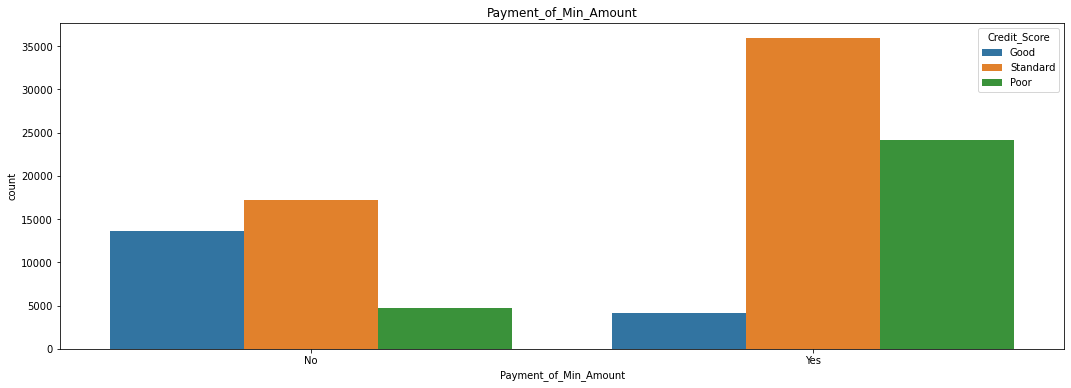

Yes    64254
No     35636
Name: Payment_of_Min_Amount, dtype: int64


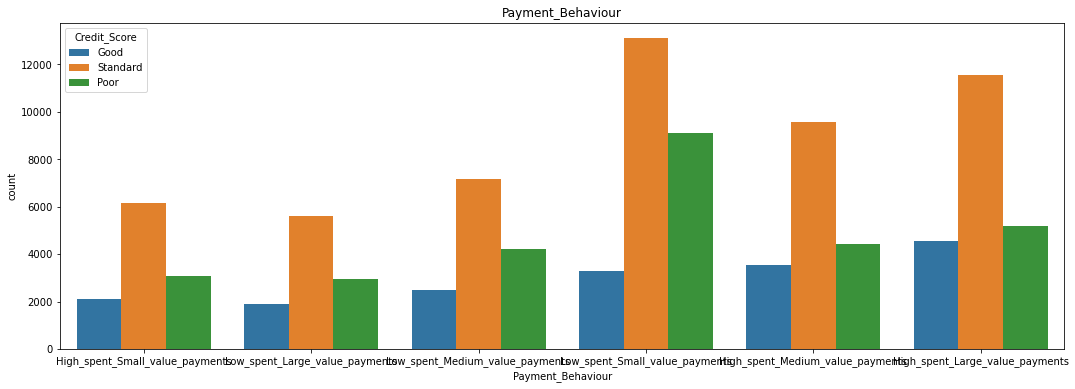

Low_spent_Small_value_payments      25471
High_spent_Large_value_payments     21297
High_spent_Medium_value_payments    17527
Low_spent_Medium_value_payments     13844
High_spent_Small_value_payments     11333
Low_spent_Large_value_payments      10418
Name: Payment_Behaviour, dtype: int64


In [39]:
md.plotCategoricalVals(train, categoric_vars, y)

### <b> Variables Continuas </b>

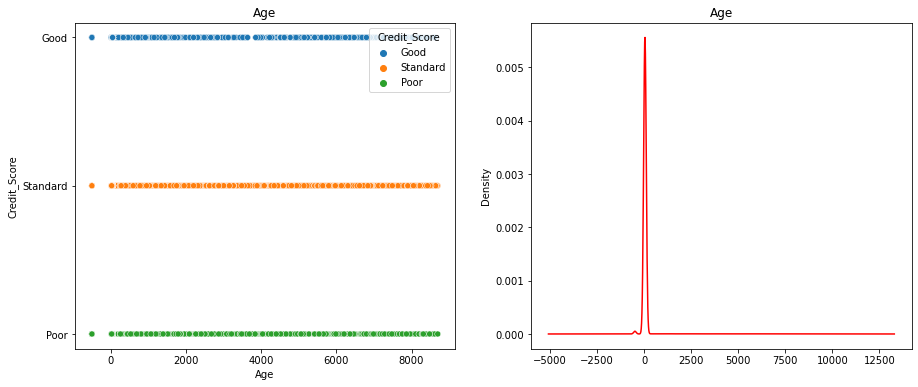

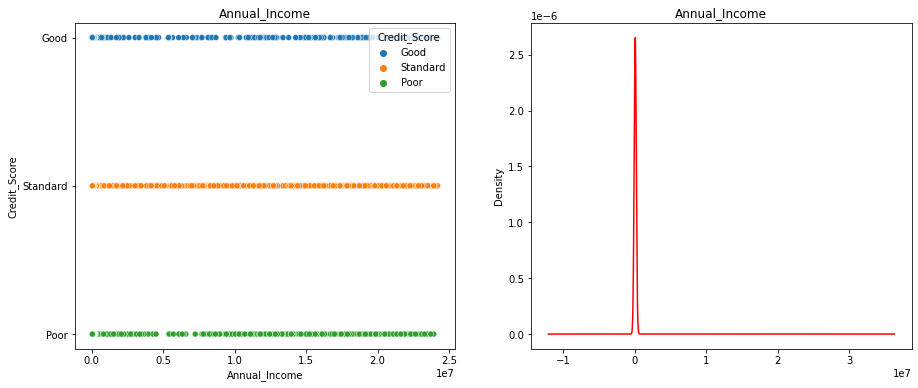

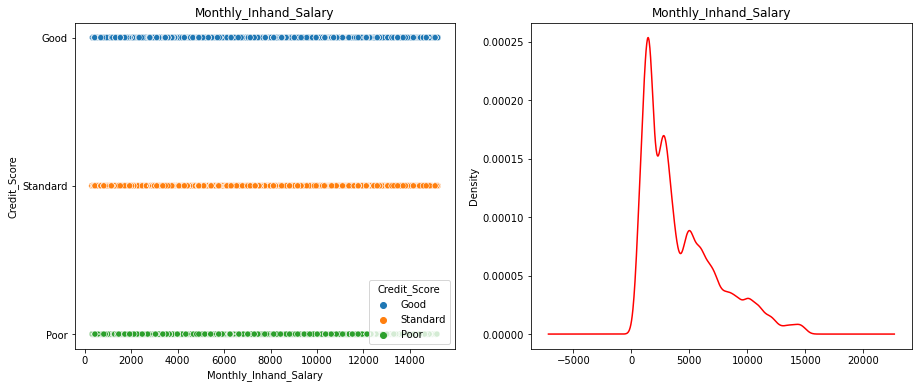

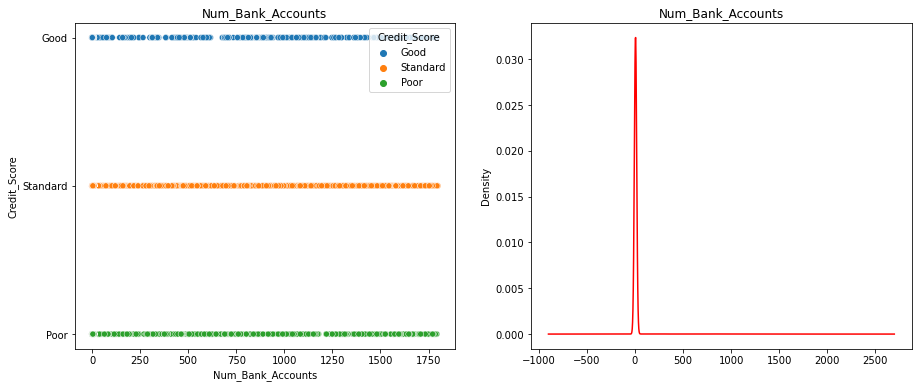

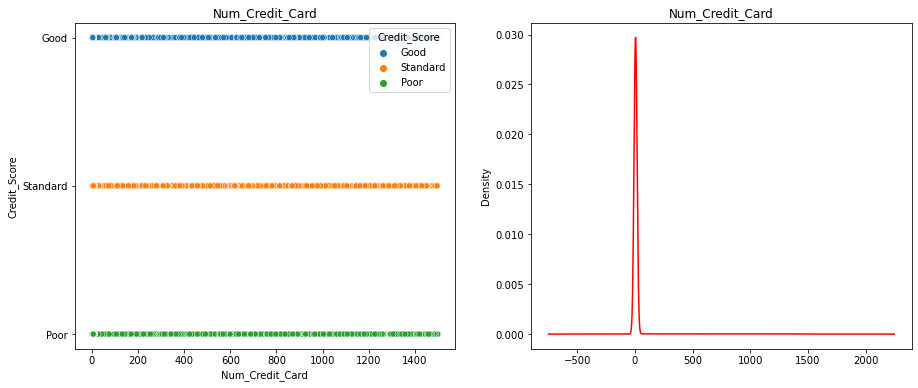

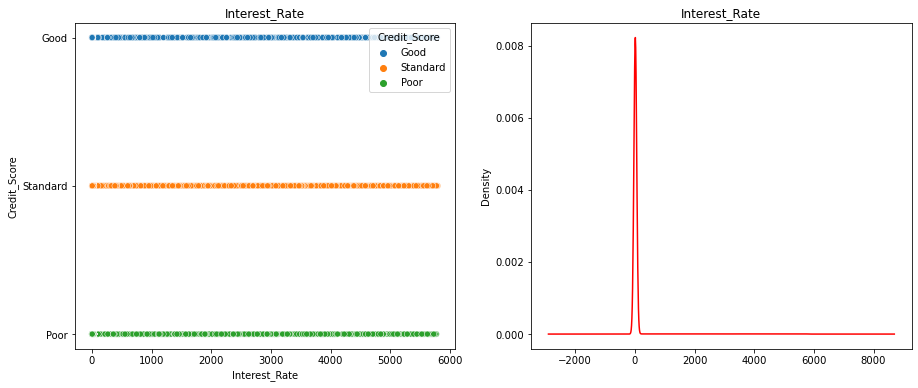

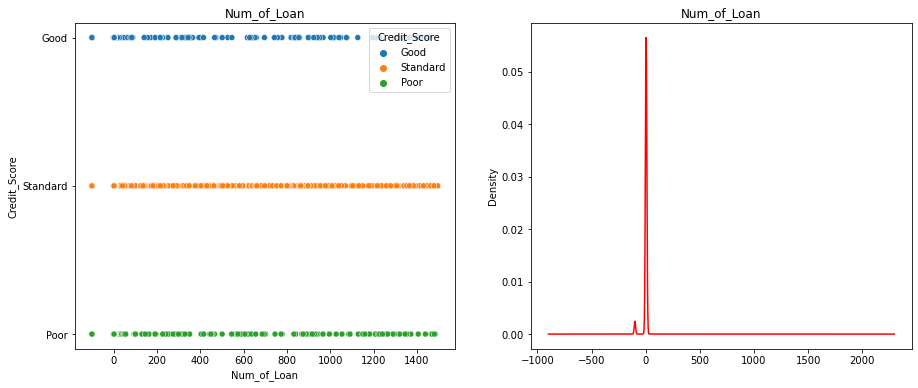

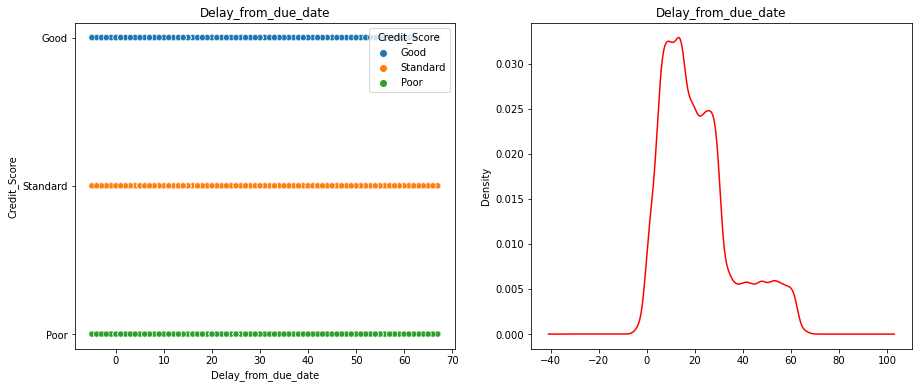

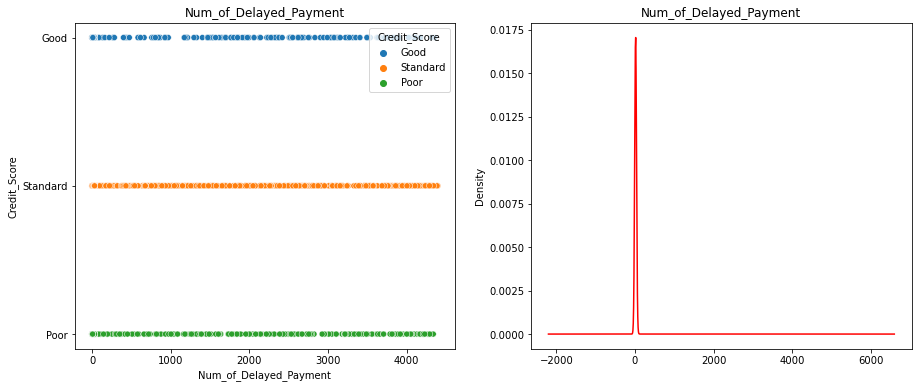

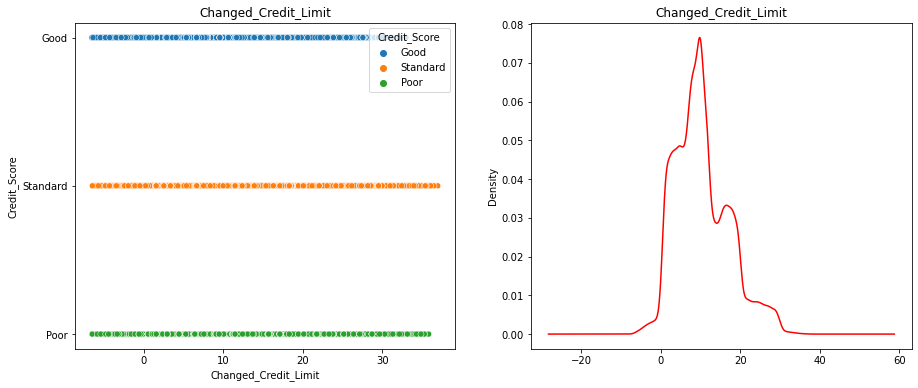

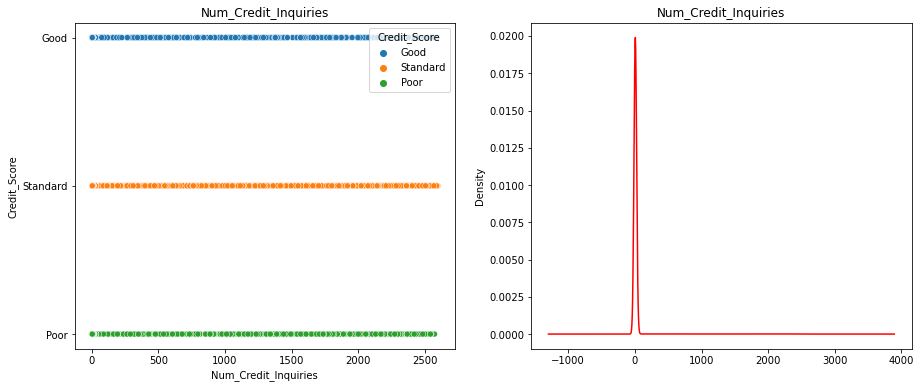

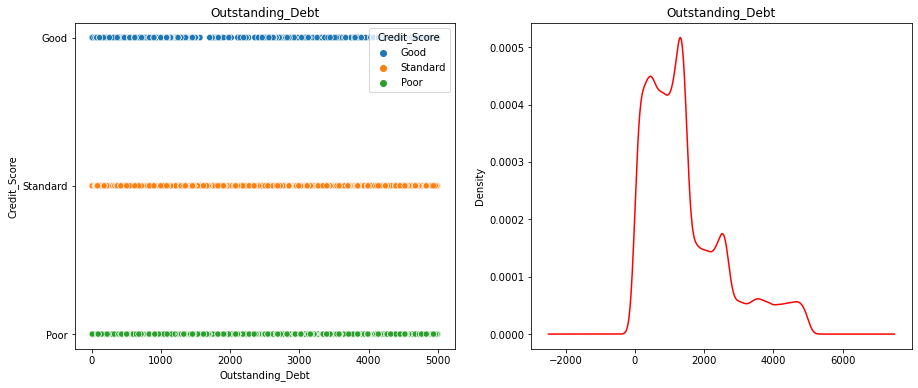

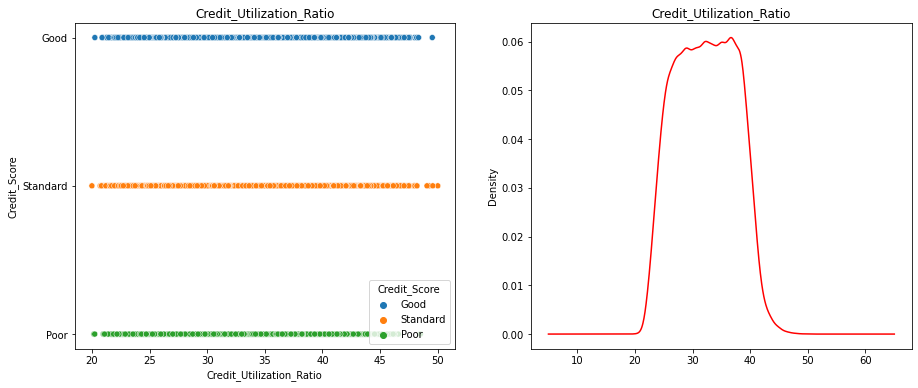

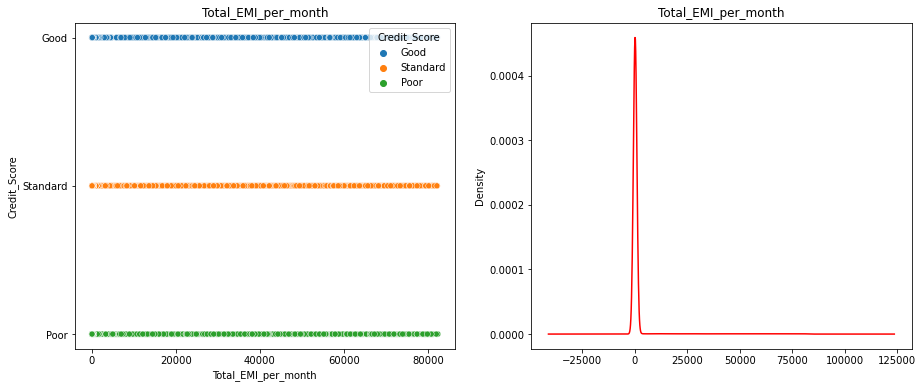

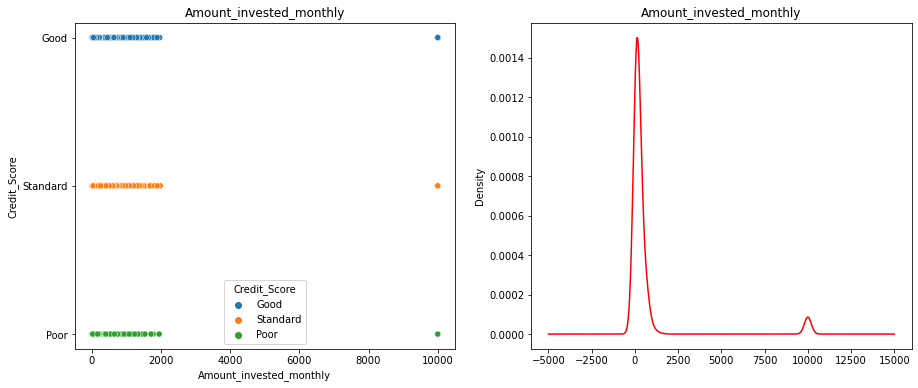

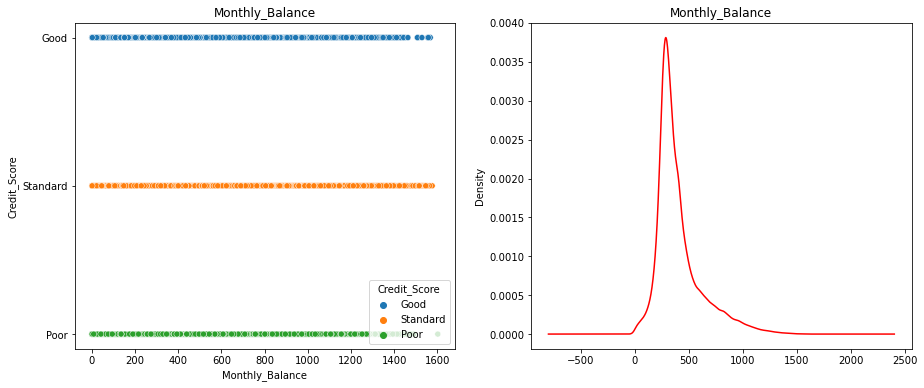

In [40]:
md.plotContinueVals(train, continues_vars, y)

### Matriz de Correlación

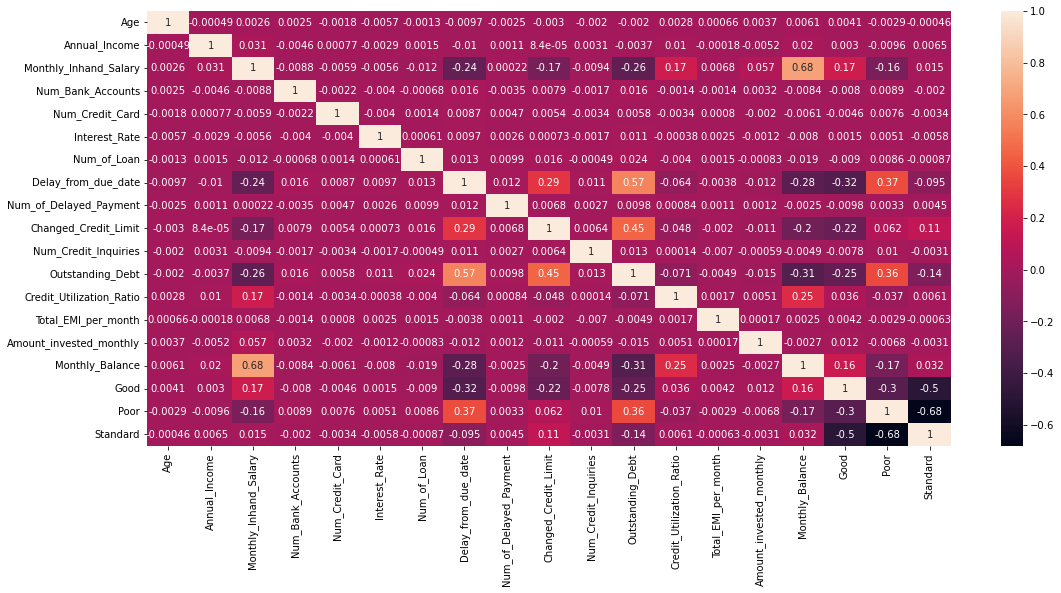

In [41]:
corr_df = train.corr(method='pearson')

plt.figure(figsize=(18, 8))
sns.heatmap(corr_df, annot=True)
plt.show()

In [42]:
train.to_csv('dataset procesados/feature.txt', sep=';', index=False)

## <b> Video </b>

https://youtu.be/9CErvmUA3Lw